In [1]:
import pandas as pd
import numpy as np
import random
from pre_no_ip_normalize import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# In[2]:


#normal_data
normal_df = pd.read_csv('data/normal1.csv')
processed_normal = process_df(normal_df)

# # attack_data
attack_df = pd.read_csv('data/attack1.csv')
processed_attack = process_df(attack_df)

In [3]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=30, n_iter=5)
svd_normal = svd.fit_transform(processed_normal.values)
svd_attack = svd.fit_transform(processed_attack.values)

from sklearn.model_selection import train_test_split

x_normal_train, x_normal_test = train_test_split(
    svd_normal, test_size=0.2, random_state=42)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(20, input_dim=svd_normal.shape[1], activation='relu'))
model.add(Dense(3, activation='relu')) # size to compress to
model.add(Dense(20, activation='relu'))
model.add(Dense(svd_normal.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=20)
model.save("svd_normalized_no_ip_5")

2022-03-18 21:43:00.054290: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-18 21:43:00.054383: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Epoch 1/20


2022-03-18 21:43:00.463325: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-18 21:43:00.591538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3514/3514 [==============================] - 15s 4ms/step - loss: 0.0573
Epoch 2/20
3514/3514 [==============================] - 14s 4ms/step - loss: 0.0474
Epoch 3/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0226
Epoch 4/20
3514/3514 [==============================] - 14s 4ms/step - loss: 0.0177
Epoch 5/20
3514/3514 [==============================] - 14s 4ms/step - loss: 0.0165
Epoch 6/20
3514/3514 [==============================] - 15s 4ms/step - loss: 0.0161
Epoch 7/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0159
Epoch 8/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0158
Epoch 9/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0158
Epoch 10/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0157
Epoch 11/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0155
Epoch 12/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0154


2022-03-18 21:47:32.218731: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


2022-03-18 21:47:42.767446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.1215450480812873
0.12167092074854874


<AxesSubplot:>

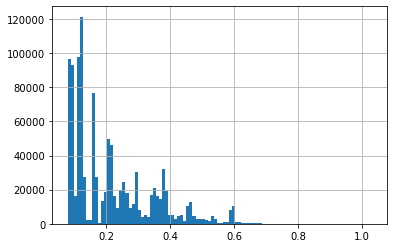

In [5]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))


# In[10]:


pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))


# In[12]:


pred_attack = model.predict(svd_attack)

score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_attack[index],svd_attack[index])))

attack_df['score'] = score_list


# In[13]:


attack_df['score'].hist(bins = 100)

0.2506760759512562

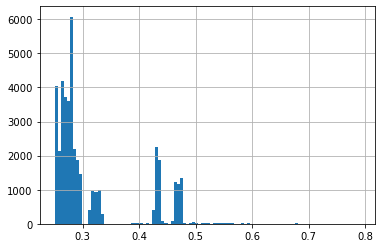

In [6]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']


# In[15]:


nmap_df['score'].hist(bins = 100)


# In[20]:


nmap_df['score'].min()

<AxesSubplot:>

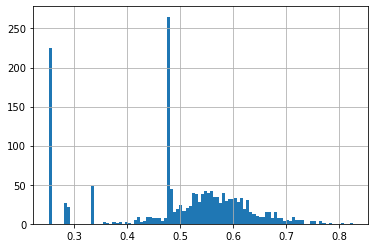

In [7]:

# In[21]:


normal_wordpress = attack_df[attack_df["ip.dst"] == '89.100.107.147']


# In[23]:


normal_wordpress['score'].hist(bins=100)